In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import re

In [2]:
collectedData = {}
df_grad_cd_list = []
for dir1 in os.listdir("CollectedData"):
    if os.path.isdir(os.path.join("CollectedData", dir1)):
        
        collectedData[dir1] = {}
        for dsn_dir in os.listdir(os.path.join("CollectedData", dir1)):
            if os.path.isdir(os.path.join("CollectedData", dir1, dsn_dir)):
                data = json.load(open(os.path.join("CollectedData", dir1, dsn_dir, "dsn_data.json"), "r"))
                collectedData[dir1][dsn_dir] = data

In [3]:
dir_list = []
dfs = []
dv_mat = []
surf_dfs = []
surf_cd_dfs = []
for dir1 in sorted(collectedData.keys()):
    if dir1.startswith("T005"):
        for dsn_dir in sorted(collectedData[dir1].keys()):
            dir_str = f"{dir1} {dsn_dir}"
            print(dir_str)
            if "config_DSN.cfg" in collectedData[dir1][dsn_dir]:
                config_lines = collectedData[dir1][dsn_dir]["config_DSN.cfg"]
                dv_line = [l for l in config_lines if l.startswith("DV_VALUE=")][-1].strip()
                #print(dv_line)
                dvs = [float(x) for x in dv_line[10:].split(", ")]
                #if len(dvs) < 30:
                #    print(dir1, dsn_dir)
                #    continue
                #print(dvs)
                dv_mat.append(dvs)
            else:
                continue
            if "grad_cd" in collectedData[dir1][dsn_dir]:
                df = pd.DataFrame.from_dict(collectedData[dir1][dsn_dir]["grad_cd"])
                df["DIR"] = dir_str
                dfs.append(df)
                dir_list.append(f"{dir1} {dsn_dir}")
            if "surface_adjoint_drag" in collectedData[dir1][dsn_dir]:
                surf_df = pd.DataFrame.from_dict(collectedData[dir1][dsn_dir]["surface_adjoint_drag"])
                surf_df["DIR"] = dir_str
                surf_cd_dfs.append(surf_df)
            if "surface_flow" in collectedData[dir1][dsn_dir]:
                surf_df = pd.DataFrame.from_dict(collectedData[dir1][dsn_dir]["surface_flow"])
                surf_df["DIR"] = dir_str
                surf_dfs.append(surf_df)
            
dv_mat = np.asarray(dv_mat)

T005_turb DSN_000
T005_turb DSN_001
T005_turb DSN_002
T005_turb DSN_003
T005_turb DSN_004
T005_turb DSN_005
T005_turb DSN_006
T005_turb DSN_007
T005_turb DSN_008
T005_turb DSN_009
T005_turb DSN_010
T005_turb DSN_011
T005_turb DSN_012
T005_turb DSN_013
T005_turb DSN_014
T005_turb DSN_015
T005_turb DSN_016
T005_turb DSN_017
T005_turb DSN_018
T005_turb DSN_019
T005_turb DSN_020
T005_turb DSN_021
T005_turb DSN_022
T005_turb DSN_023
T005_turb DSN_024
T005_turb DSN_025
T005_turb DSN_026
T005_turb DSN_027
T005_turb DSN_028
T005_turb DSN_029
T005_turb DSN_030
T005_turb DSN_031
T005_turb DSN_032
T005_turb DSN_033
T005_turb DSN_034
T005_turb DSN_035
T005_turb DSN_036
T005_turb DSN_037
T005_turb DSN_038
T005_turb DSN_039
T005_turb DSN_040
T005_turb DSN_041
T005_turb DSN_042
T005_turb DSN_043
T005_turb DSN_044
T005_turb DSN_045
T005_turb DSN_046
T005_turb DSN_047
T005_turb DSN_048
T005_turb DSN_049
T005_turb DSN_050
T005_turb DSN_051
T005_turb DSN_052
T005_turb DSN_053
T005_turb DSN_054
T005_turb 

In [7]:
dir_list = []
dfs = []
dv_mat = []
surf_dfs = []
surf_cd_dfs = []

re_log_line = r"\|\s+\d+(\|\s+-?\d+\.\d+){4}\|\n"

result_rows = []
for dir1 in sorted(collectedData.keys()):
    if dir1.startswith("T005"):
        for dsn_dir in sorted(collectedData[dir1].keys()):
            dir_str = f"{dir1} {dsn_dir}"
            print(dir_str)
            field_names = ["config_DSN.cfg", "grad_cd", "surface_adjoint_drag", "surface_flow", "log_direct"]
            if len(collectedData[dir1][dsn_dir].keys() & set(field_names)) < len(field_names):
                print("skipping", dir_str)
                continue
            if "config_DSN.cfg" in collectedData[dir1][dsn_dir]:
                config_lines = collectedData[dir1][dsn_dir]["config_DSN.cfg"]
                dv_line = [l for l in config_lines if l.startswith("DV_VALUE=")][-1].strip()
                #print(dv_line)
                dvs = [float(x) for x in dv_line[10:].split(", ")]
                #if len(dvs) < 30:
                #    print(dir1, dsn_dir)
                #    continue
                #print(dvs)
                dv_mat.append(dvs)
            if "grad_cd" in collectedData[dir1][dsn_dir]:
                df = pd.DataFrame.from_dict(collectedData[dir1][dsn_dir]["grad_cd"])
                df["DIR"] = dir_str
                dfs.append(df)
                dir_list.append(f"{dir1} {dsn_dir}")
            if "surface_adjoint_drag" in collectedData[dir1][dsn_dir]:
                surf_df = pd.DataFrame.from_dict(collectedData[dir1][dsn_dir]["surface_adjoint_drag"])
                surf_df["DIR"] = dir_str
                surf_cd_dfs.append(surf_df)
            if "surface_flow" in collectedData[dir1][dsn_dir]:
                surf_df = pd.DataFrame.from_dict(collectedData[dir1][dsn_dir]["surface_flow"])
                surf_df["DIR"] = dir_str
                surf_dfs.append(surf_df)
            if "log_direct" in collectedData[dir1][dsn_dir]:
                log_lines = collectedData[dir1][dsn_dir]["log_direct"]
                log_lines_iter = [l for l in log_lines if re.match(re_log_line, l)]#[-100:]
                lls = log_lines_iter[-1].split("|")[1:-1]
                iteration = int(lls[0])
                rms_rho = float(lls[1])
                rms_nu = float(lls[2])
                c_L = float(lls[3])
                c_D = float(lls[4])
                #print(dir_str, c_L, c_D)
                result_rows.append((dir_str, c_L, c_D))

dv_mat = np.asarray(dv_mat)
df_result = pd.DataFrame(columns=["DIR", "c_L", "c_D"], data=result_rows)

T005_turb DSN_000
T005_turb DSN_001
T005_turb DSN_002
T005_turb DSN_003
T005_turb DSN_004
T005_turb DSN_005
T005_turb DSN_006
T005_turb DSN_007
T005_turb DSN_008
T005_turb DSN_009
T005_turb DSN_010
T005_turb DSN_011
T005_turb DSN_012
T005_turb DSN_013
T005_turb DSN_014
T005_turb DSN_015
T005_turb DSN_016
T005_turb DSN_017
T005_turb DSN_018
T005_turb DSN_019
T005_turb DSN_020
T005_turb DSN_021
T005_turb DSN_022
T005_turb DSN_023
T005_turb DSN_024
T005_turb DSN_025
T005_turb DSN_026
T005_turb DSN_027
T005_turb DSN_028
T005_turb DSN_029
T005_turb DSN_030
T005_turb DSN_031
T005_turb DSN_032
T005_turb DSN_033
T005_turb DSN_034
T005_turb DSN_035
T005_turb DSN_036
T005_turb DSN_037
T005_turb DSN_038
T005_turb DSN_039
T005_turb DSN_040
T005_turb DSN_041
T005_turb DSN_042
T005_turb DSN_043
T005_turb DSN_044
T005_turb DSN_045
T005_turb DSN_046
T005_turb DSN_047
T005_turb DSN_048
T005_turb DSN_049
T005_turb DSN_050
T005_turb DSN_051
T005_turb DSN_052
T005_turb DSN_053
T005_turb DSN_054
T005_turb 

In [8]:
import pickle
dir1 = "T005_turb"
dv_list = pickle.load(open(os.path.join("CollectedData", dir1, "dv_list.p"), "rb"))
dv_mat = np.asarray(dv_list)
dv_mat

array([[-3.46571906e-05, -6.86867816e-06, -1.18898479e-05, ...,
        -3.77446231e-05, -2.92516997e-05, -4.75072084e-05],
       [-2.45542815e-05,  4.75486013e-05, -2.54398255e-05, ...,
         2.40320442e-05, -1.20087325e-05, -1.99073638e-05],
       [ 4.86885001e-05, -3.25851252e-05,  2.17326105e-05, ...,
        -3.39332217e-07,  7.75521949e-06,  4.10507055e-05],
       ...,
       [-3.81460231e-05,  3.11836338e-05, -2.45930751e-05, ...,
         1.59208175e-05,  4.31007975e-05, -4.19221178e-05],
       [ 1.40029606e-05, -3.94638701e-05,  2.83077297e-05, ...,
        -8.43825364e-06, -3.87496257e-05,  1.90224946e-05],
       [ 2.20057063e-05,  1.44411561e-05, -8.14535906e-06, ...,
        -4.01719008e-05,  3.43597458e-05,  1.76892336e-05]])

In [9]:
collectedData["T005_turb"]["DSN_015"]["grad_cd"]

{'VAR': {'0': 0,
  '1': 1,
  '2': 2,
  '3': 3,
  '4': 4,
  '5': 5,
  '6': 6,
  '7': 7,
  '8': 8,
  '9': 9,
  '10': 10,
  '11': 11,
  '12': 12,
  '13': 13,
  '14': 14,
  '15': 15,
  '16': 16,
  '17': 17,
  '18': 18,
  '19': 19,
  '20': 20,
  '21': 21,
  '22': 22,
  '23': 23,
  '24': 24,
  '25': 25,
  '26': 26,
  '27': 27,
  '28': 28,
  '29': 29,
  '30': 30,
  '31': 31,
  '32': 32,
  '33': 33,
  '34': 34,
  '35': 35,
  '36': 36,
  '37': 37},
 'CD_GRAD': {'0': 0.8524379999999999,
  '1': 0.8762629999999999,
  '2': 0.788337,
  '3': 0.660079,
  '4': 0.52704,
  '5': 0.41003999999999996,
  '6': 0.320474,
  '7': 0.262548,
  '8': 0.23495500000000002,
  '9': 0.23265999999999998,
  '10': 0.24879600000000002,
  '11': 0.27629699999999996,
  '12': 0.30859899999999996,
  '13': 0.338363,
  '14': 0.351928,
  '15': 0.31243000000000004,
  '16': 0.10636,
  '17': -0.631774,
  '18': -2.96926,
  '19': 6.88076,
  '20': 6.72222,
  '21': 5.78212,
  '22': 4.53811,
  '23': 3.2200900000000003,
  '24': 1.97104000000

In [22]:
dv_mat.shape

(1000, 38)

In [10]:
df_cd_grad = pd.concat(dfs) #.sort_values("DIR")

In [11]:
df_cd_grad.iloc[35:40]

,VAR,CD_GRAD,STEP,DIR
35,35,-0.103043,0.001,T005_turb DSN_000
36,36,0.081847,0.001,T005_turb DSN_000
37,37,0.574276,0.001,T005_turb DSN_000
0,0,1.012340,0.001,T005_turb DSN_001
1,1,1.033630,0.001,T005_turb DSN_001


In [12]:
d_CD = np.resize(df_cd_grad["CD_GRAD"].values, ((len(dir_list), 38)))

In [13]:
d_CD

array([[ 0.886812 ,  0.869571 ,  0.739042 , ..., -0.103043 ,  0.0818468,
         0.574276 ],
       [ 1.01234  ,  1.03363  ,  0.915411 , ..., -0.505756 , -0.0122508,
         1.2491   ],
       [ 1.07597  ,  1.0248   ,  0.849889 , ...,  0.0133906, -0.0323584,
        -0.0382941],
       ...,
       [ 0.779205 ,  0.758332 ,  0.636881 , ..., -0.160287 , -0.13716  ,
        -0.104455 ],
       [ 0.993864 ,  0.972563 ,  0.820925 , ..., -0.0599114,  0.368907 ,
         0.41617  ],
       [ 1.11091  ,  1.09499  ,  0.9422   , ..., -0.123711 ,  0.167905 ,
         1.13008  ]])

In [14]:
df_surface = pd.concat(surf_dfs)
df_surface_adjoint_drag_total = pd.concat(surf_cd_dfs)
df_surface = df_surface.merge(df_surface_adjoint_drag_total, on=["PointID", "DIR"], suffixes=["", "_right"])

In [15]:
df_surface

,PointID,x,y,Density,Momentum_x,Momentum_y,Energy,Nu_Tilde,Pressure,Temperature,...,DIR,x_right,y_right,Adjoint_Density,Adjoint_Momentum_x,Adjoint_Momentum_y,Adjoint_Energy,Sensitivity_x,Sensitivity_y,Surface_Sensitivity
0,25,0.985397,0.001320,0.467606,0.0,0.0,106402.343194,0.0,42560.937277,317.074398,...,T005_turb DSN_000,0.985397,0.001320,-147.341020,1.000130,0.020001,-0.001506,0.0,0.0,2.539130
1,51,0.969573,0.003044,0.479956,0.0,0.0,109285.304654,0.0,43714.121862,317.285873,...,T005_turb DSN_000,0.969573,0.003044,-190.835087,1.000130,0.020001,-0.000611,0.0,0.0,0.786909
2,77,0.952680,0.003691,0.481608,0.0,0.0,109684.682829,0.0,43873.873132,317.352699,...,T005_turb DSN_000,0.952680,0.003691,-191.882153,1.000130,0.020001,-0.000442,0.0,0.0,0.318721
3,103,0.934996,0.002894,0.477242,0.0,0.0,108680.876144,0.0,43472.350458,317.325267,...,T005_turb DSN_000,0.934996,0.002894,-154.549955,1.000130,0.020001,-0.000456,0.0,0.0,0.156403
4,129,0.916822,0.001547,0.473208,0.0,0.0,107747.903994,0.0,43099.161598,317.283144,...,T005_turb DSN_000,0.916822,0.001547,-106.536352,1.000130,0.020001,-0.000516,0.0,0.0,0.061978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17467,4887,0.964163,0.005437,0.441420,0.0,0.0,100424.408004,0.0,40169.763201,317.013093,...,T005_turb DSN_090,0.964163,0.005437,48.108595,1.001502,-0.018648,0.000954,0.0,0.0,-0.343424
17468,4913,0.973876,0.004479,0.441692,0.0,0.0,100494.068209,0.0,40197.627283,317.037895,...,T005_turb DSN_090,0.973876,0.004479,147.022025,1.001502,-0.018648,0.001019,0.0,0.0,-0.654723
17469,4939,0.983087,0.003320,0.442996,0.0,0.0,100795.457528,0.0,40318.183011,317.052548,...,T005_turb DSN_090,0.983087,0.003320,224.103067,1.001502,-0.018648,0.001061,0.0,0.0,-1.092971
17470,4965,0.991850,0.001867,0.445025,0.0,0.0,101245.718807,0.0,40498.287523,317.017043,...,T005_turb DSN_090,0.991850,0.001867,222.777695,1.001502,-0.018648,0.002138,0.0,0.0,-1.788253


In [16]:
input_columns = ["x", "y"]
dir_names = dir_list

N = len(dir_names)
M = len(input_columns)

X = np.zeros((N, 192, M))
Y = np.zeros((N, 192, 4))

for i, dir in enumerate(dir_names):
    print(dir)
    df_surface_flow = df_surface[df_surface["DIR"] == dir]
    X[i,:,0] = df_surface_flow["x"]
    X[i,:,1] = df_surface_flow["y"]
    Y[i,:,0] = df_surface_flow["Pressure_Coefficient"]
    Y[i,:,1] = df_surface_flow["Surface_Sensitivity"]
    Y[i,:,2] = df_surface_flow["Skin_Friction_Coefficient_x"]
    Y[i,:,3] = df_surface_flow["Skin_Friction_Coefficient_y"]

T005_turb DSN_000
T005_turb DSN_001
T005_turb DSN_002
T005_turb DSN_003
T005_turb DSN_004
T005_turb DSN_005
T005_turb DSN_006
T005_turb DSN_007
T005_turb DSN_008
T005_turb DSN_009
T005_turb DSN_010
T005_turb DSN_011
T005_turb DSN_012
T005_turb DSN_013
T005_turb DSN_014
T005_turb DSN_015
T005_turb DSN_016
T005_turb DSN_017
T005_turb DSN_018
T005_turb DSN_019
T005_turb DSN_020
T005_turb DSN_021
T005_turb DSN_022
T005_turb DSN_023
T005_turb DSN_024
T005_turb DSN_025
T005_turb DSN_026
T005_turb DSN_027
T005_turb DSN_028
T005_turb DSN_029
T005_turb DSN_030
T005_turb DSN_031
T005_turb DSN_032
T005_turb DSN_033
T005_turb DSN_034
T005_turb DSN_035
T005_turb DSN_036
T005_turb DSN_037
T005_turb DSN_038
T005_turb DSN_039
T005_turb DSN_040
T005_turb DSN_041
T005_turb DSN_042
T005_turb DSN_043
T005_turb DSN_044
T005_turb DSN_045
T005_turb DSN_046
T005_turb DSN_047
T005_turb DSN_048
T005_turb DSN_049
T005_turb DSN_050
T005_turb DSN_051
T005_turb DSN_052
T005_turb DSN_053
T005_turb DSN_054
T005_turb 

In [17]:
import matplotlib.pyplot as plt

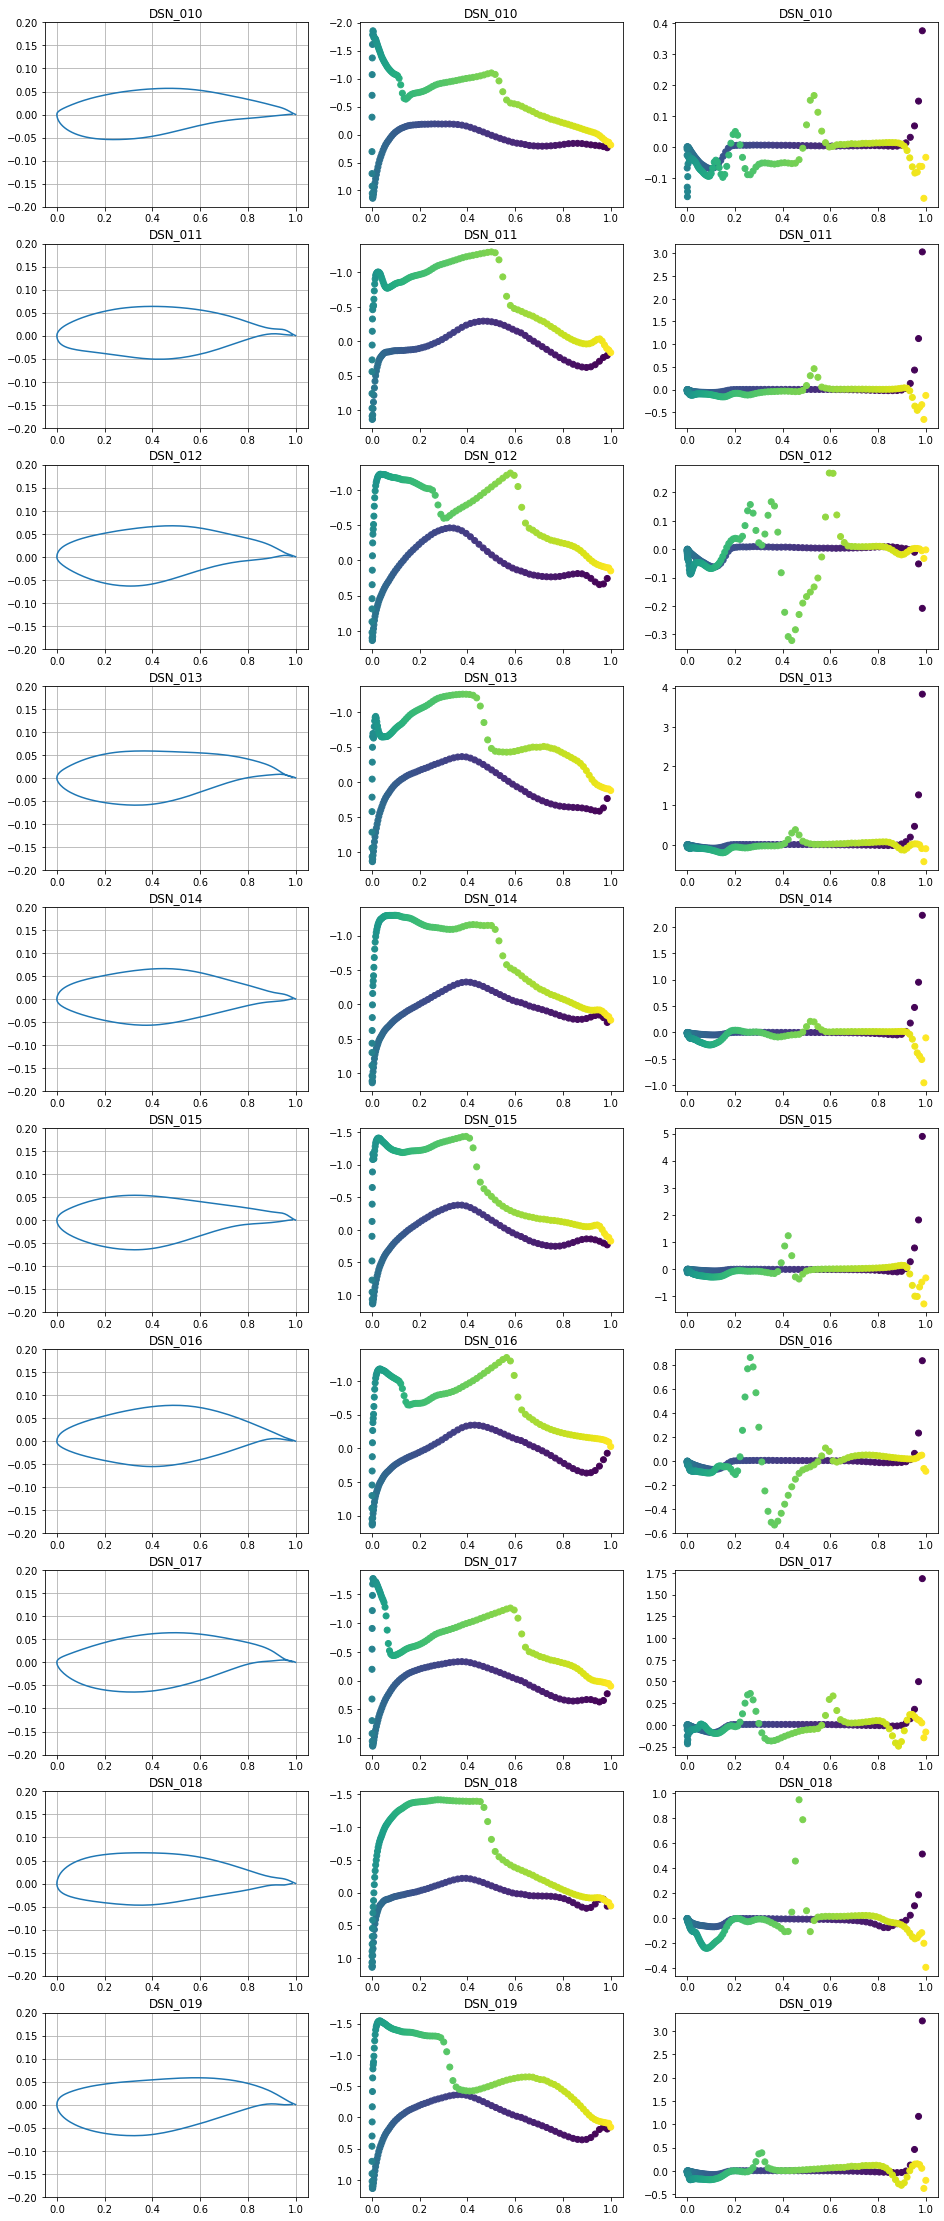

In [18]:
#fig, axes = plt.subplots(N, 3, figsize=(16,4*N))
fig, axes = plt.subplots(10, 3, figsize=(16,40))

#plt.gca().invert_yaxis()

for k, ax in enumerate(axes.flat):
    i = int(k / 3) + 10
    j = k % 3
    #ax.plot(X[i,:,0], Y[i,:,0], ".")
    #ax.plot(X[i,:,0], Y[i,:,j], ".")
    if j == 0:
        ax.plot(X[i,:,0], X[i,:,1], "-")
        ax.set_ylim((-0.2, 0.2))
        ax.grid(True, "both")
        #ax.set_subtitle("GEO")
    elif j == 1:
        ax.scatter(X[i,:,0], Y[i,:,0],c=np.linspace(0, 1, 192))
        ax.invert_yaxis()
        
    elif j == 2:
        ax.scatter(X[i,:,0], Y[i,:,1],c=np.linspace(0, 1, 192))
    ax.set_title(dir_names[i][-7:])
    #print(-np.sum(0.5*(Y[i,1:,0]*dx + Y[i,:-1,0]*dx)))

In [34]:
fig.savefig("test.png", dpi=200)

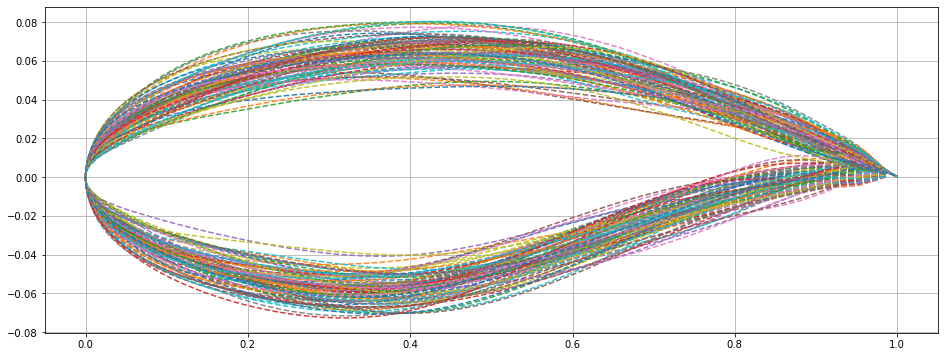

In [47]:
fig, ax = plt.subplots(1, figsize=(16,6))
for i in range(91):
    ax.plot(X[i,:,0], X[i,:,1], "--", alpha=0.9)
ax.grid(True, "both")

In [48]:
fig.savefig("test2.png", dpi=200)

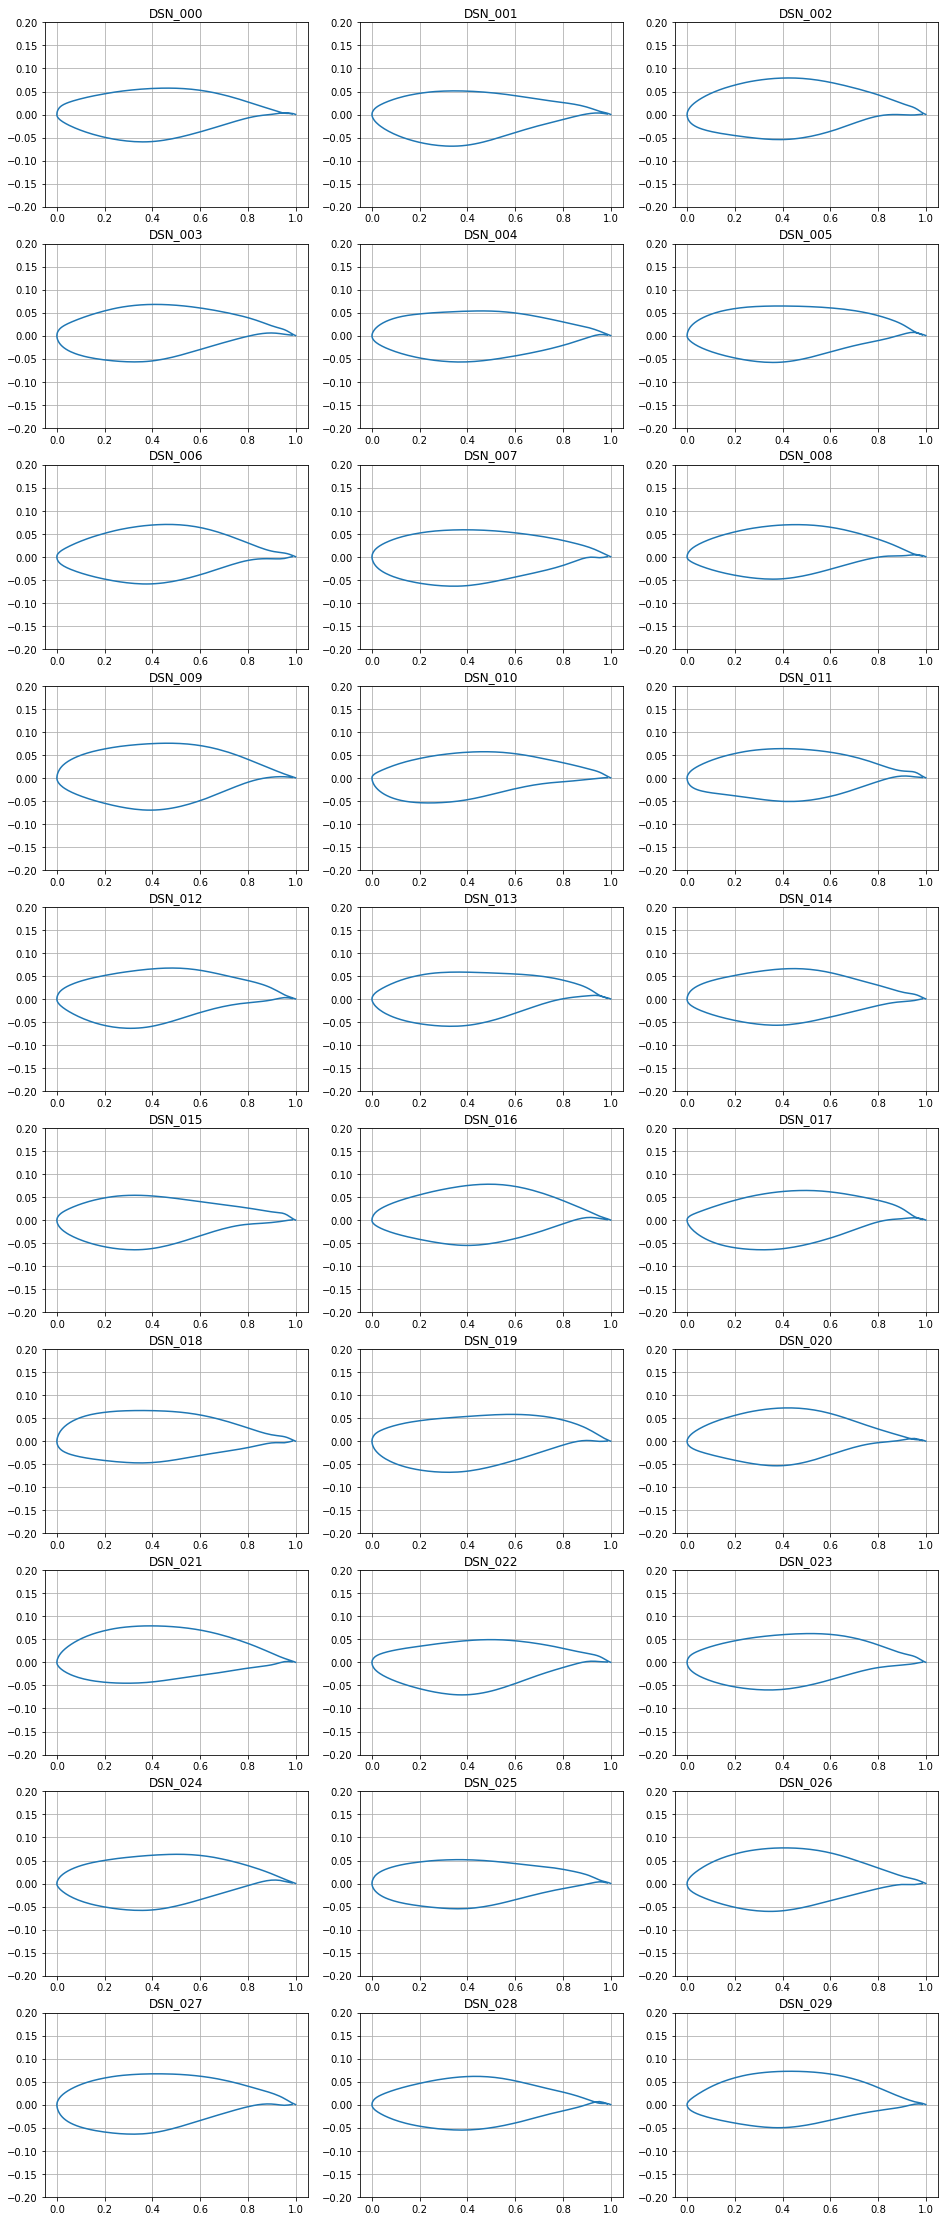

In [49]:
fig, axes = plt.subplots(10, 3, figsize=(16,40))

#plt.gca().invert_yaxis()

for k, ax in enumerate(axes.flat):
    i = int(k / 3) + 10
    j = k % 3
    
    i = k
    j = 0
    #ax.plot(X[i,:,0], Y[i,:,0], ".")
    #ax.plot(X[i,:,0], Y[i,:,j], ".")
    if j == 0:
        ax.plot(X[i,:,0], X[i,:,1], "-")
        ax.set_ylim((-0.2, 0.2))
        ax.grid(True, "both")
        #ax.set_subtitle("GEO")
    ax.set_title(dir_names[i][-7:])

In [51]:
fig.savefig("test3.png", dpi=200)

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class TestModel(nn.Module):
    def __init__(self):
        super(TestModel, self).__init__()
        
        self.hidden_size = 16
        self.bidirectional = True
                
        self.encoder = nn.Sequential(
            #nn.TransformerEncoderLayer(d_model=M, nhead=16),
            #nn.Conv1d(in_channels=M,out_channels=16,kernel_size=15,stride=1),
            #nn.SELU(),
            #nn.AlphaDropout(0.1),
            nn.Conv1d(in_channels=2,out_channels=8,kernel_size=15,stride=3),
            nn.SELU(),
            nn.AlphaDropout(0.1),
            nn.Conv1d(in_channels=8,out_channels=16,kernel_size=15,stride=3),
            nn.SELU(),
            nn.AlphaDropout(0.1),
            #nn.Linear(29,16),
            #nn.SELU(),
            #nn.Linear(16,16),
            #nn.SELU(),
            #nn.Linear(16,8)
        )
        #self.conv1 = nn.Conv1d(in_channels=64,out_channels=32,kernel_size=15,stride=2)
        #self.selu1 = nn.SELU()
        #self.alpha_do1 = nn.AlphaDropout(0.1)
        #self.skip2 = nn.Linear(2,)
        
        
        self.gru = nn.GRU(input_size=16, hidden_size=self.hidden_size, bidirectional=self.bidirectional, dropout=0.1, num_layers=3)
        #self.skip1 = nn.Linear(M, self.hidden_size)
        #self.pool1 = nn.MaxPool1d()
        self.lin1 = nn.Linear(16*32, 38)
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose1d(in_channels=1,out_channels=4,kernel_size=5,stride=2),
            nn.SELU(),
            nn.ConvTranspose1d(in_channels=4,out_channels=8,kernel_size=5,stride=2),
            nn.SELU(),
            #nn.ConvTranspose1d(in_channels=4,out_channels=2,kernel_size=5,stride=2),
            #nn.ELU(),
           # nn.Linear(193, 192),
            #nn.Conv1d(in_channels=4,out_channels=1,kernel_size=2,stride=1),
            #nn.ELU(),
           # nn.SELU(),
           # nn.AlphaDropout(0.1),
        )
        
        self.out = nn.Linear(64, 1)
    
    def forward(self, x, h):
        
        x_T = torch.transpose(x, 1, 2)
        
        z = self.encoder(x_T)
        z, h = self.gru(z, h)
        z = self.lin1(z.view(-1, 1, 16*32))
        
        return z, h
        #return self.out(z)
        
    def init_hidden(self):
        if self.bidirectional:
            return(torch.zeros(2*3, 16, self.hidden_size))
        else:
            return(torch.zeros(3, 212, self.hidden_size))

In [ ]:
x0 = torch.from_numpy(dv_mat[0]).view(1, 1, -1)

In [ ]:
x0.shape

In [ ]:
X[0].shape

In [ ]:
tm = TestModel()

In [ ]:
x0 = torch.from_numpy(X[0]).view(1, -1, 2)
x0 = torch.transpose(x0, 1, 2)
x0 = torch.rand((1,2,192))
z = tm.encoder(x0) #.view(1, 1, -1)
z = z, h = tm.gru(z)
z = tm.lin1(z.view(1,1,-1))

In [ ]:
h.shape, z.shape

In [ ]:
tm.init_hidden().shape

In [ ]:
tm.decoder(z).shape

In [ ]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params
    
count_parameters(tm)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, d_CD, test_size=0.25)

In [ ]:
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).float().view(-1, 1, 38)

In [ ]:
y_train.shape

In [ ]:
dataset = torch.utils.data.TensorDataset(x_train, y_train)
loader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True, pin_memory=True)

In [ ]:
net = TestModel()

In [ ]:
import torch.optim as optim


criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.09)
#optimizer = optim.Adagrad(net.parameters(),)
optimizer = optim.Adam(net.parameters(),)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.85)

In [ ]:
net.train()

for epoch in range(2000):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, target = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        #outputs = net(inputs)
        
        h0 = net.init_hidden()
        outputs, h = net(inputs, h0)
        
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 10 == 9:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %f' %
                  (epoch + 1, i + 1, running_loss / 10))
            running_loss = 0.0
    scheduler.step()
    print(scheduler.get_last_lr())
    #print('[%d, %5d] loss: %f' % (epoch + 1, i + 1, running_loss / i))
print('Finished Training')

In [ ]:
inputs.shape, target.shape

In [ ]:
net.float()

In [ ]:
x.dtype

In [ ]:
x = inputs

x_T = torch.transpose(x, 1, 2)

z = net.encoder(x_T)
z, h = net.gru(z, h).view(-1, 1, 16*32)
z = net.lin1(z)

In [ ]:
x.shape